In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [11]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [13]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [14]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [15]:
# start building a model
model = Sequential()
# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 361us/step - loss: 1.2726 - acc: 0.6958 - val_loss: 0.8109 - val_acc: 0.8289
Epoch 2/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.7147 - acc: 0.8389 - val_loss: 0.6085 - val_acc: 0.8581
Epoch 3/20
 4992/60000 [=>............................] - ETA: 32s - loss: 0.6248 - acc: 0.8566

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100999). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100999). Check your callbacks.
  % delta_t_median)


 5248/60000 [=>............................] - ETA: 33s - loss: 0.6233 - acc: 0.8565

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100999). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102498). Check your callbacks.
  % delta_t_median)


 5888/60000 [=>............................] - ETA: 35s - loss: 0.6203 - acc: 0.8572

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100999). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 21s 356us/step - loss: 0.5871 - acc: 0.8584 - val_loss: 0.5263 - val_acc: 0.8718
Epoch 4/20
48256/60000 [=======================>......] - ETA: 5s - loss: 0.5276 - acc: 0.8682

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106001). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106001). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106001). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111000). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Met

60000/60000 [==============================] - 27s 450us/step - loss: 0.5255 - acc: 0.8677 - val_loss: 0.4808 - val_acc: 0.8795
Epoch 5/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.4880 - acc: 0.8742 - val_loss: 0.4503 - val_acc: 0.8855
Epoch 6/20
54784/60000 [==========================>...] - ETA: 1s - loss: 0.4638 - acc: 0.8792

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100537). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109557). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109557). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107558). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Met

55040/60000 [==========================>...] - ETA: 1s - loss: 0.4637 - acc: 0.8791

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110064). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101007). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 21s 352us/step - loss: 0.4622 - acc: 0.8796 - val_loss: 0.4289 - val_acc: 0.8892
Epoch 7/20
31872/60000 [==============>...............] - ETA: 7s - loss: 0.4455 - acc: 0.8820

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101499). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101499). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101499). Check your callbacks.
  % delta_t_median)


32640/60000 [===============>..............] - ETA: 7s - loss: 0.4445 - acc: 0.8825

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101499). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 23s 378us/step - loss: 0.4429 - acc: 0.8829 - val_loss: 0.4125 - val_acc: 0.8920
Epoch 8/20
39936/60000 [==================>...........] - ETA: 7s - loss: 0.4308 - acc: 0.8861

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102484). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102484). Check your callbacks.
  % delta_t_median)


40192/60000 [===================>..........] - ETA: 7s - loss: 0.4304 - acc: 0.8861

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102491). Check your callbacks.
  % delta_t_median)


41600/60000 [===================>..........] - ETA: 6s - loss: 0.4307 - acc: 0.8857

C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100002). Check your callbacks.
  % delta_t_median)
C:\Users\Administrateur.000\Anaconda3\envs\tensor_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100002). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 20s 332us/step - loss: 0.4280 - acc: 0.8862 - val_loss: 0.3996 - val_acc: 0.8959
Epoch 9/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.4159 - acc: 0.8890 - val_loss: 0.3890 - val_acc: 0.8981
Epoch 10/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.4059 - acc: 0.8910 - val_loss: 0.3802 - val_acc: 0.9002
Epoch 11/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.3974 - acc: 0.8928 - val_loss: 0.3732 - val_acc: 0.9015
Epoch 12/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.3901 - acc: 0.8942 - val_loss: 0.3664 - val_acc: 0.9029
Epoch 13/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.3837 - acc: 0.8957 - val_loss: 0.3605 - val_acc: 0.9039
Epoch 14/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.3780 - acc: 0.8970 - val_loss: 0.3560 - val_acc: 0.9051
Epoch 15/20
60000/60000 [========

Test score: 0.33447343609333036
Test accuracy: 0.9097


<IPython.core.display.Javascript object>


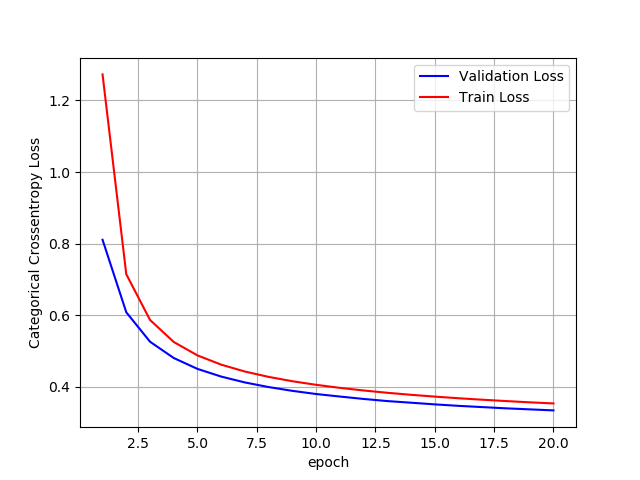

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)